In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
rating_df = pd.read_csv('u.data',sep='\t',header=None)
rating_df.columns = ['user_id', 'item_id', 'rating' ,'timestamp']
rating_df

In [ ]:
movie_info_df = pd.read_csv('u.item',sep='\|',header=None, encoding='latin')
movie_info_df.columns = [ "movie_id", "movie_title", "release_date", "video_release_date",
              "IMDb_URL" , "unknown" ,"Action" ,"Adventure" ,"Animation" ,
              "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
              "Film-Noir" ,"Horror" ,"Musical" ,"Mystery","Romance", "Sci-Fi",'Thriller','War','Western']
movie_info_df


In [ ]:
user_info_df = pd.read_csv('u.user',sep='\|',header=None)
user_info_df.columns = ['user_id','age','gender','occupation','zip_code']
user_info_df

In [ ]:
# movie_info_df['release_date_dt'] = pd.to_datetime(movie_info_df['release_date'])
# movie_info_df.info()

In [ ]:
# movie_info_df.query('5<release_date_dt.dt.month<9 & (Thriller == 1 | Horror == 1)')

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
user_rating_df = pd.merge(rating_df, user_info_df, on='user_id')
user_rating_df

In [ ]:
user_rating_movie_df = pd.merge(user_rating_df, movie_info_df, left_on='item_id', right_on='movie_id')
user_rating_movie_df

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,movie_id,movie_title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,60089,1679,B. Monkey (1998),...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,60089,1678,Mat' i syn (1997),...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,60089,1680,Sliding Doors (1998),...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,91505,1681,You So Crazy (1994),...,0,0,0,0,0,0,0,0,0,0


In [ ]:
occ= user_info_df.occupation.unique()
occ

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
occ

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
#각 직업 평균점수 healthcare종사자 좀짜게줌
meanscore= {}

for k,v in user_rating_df.groupby(['occupation']).mean()['rating'].iteritems():
    meanscore[k] = v

meanscore

{'administrator': 3.6356464768017114,
 'artist': 3.653379549393414,
 'doctor': 3.688888888888889,
 'educator': 3.6706206312221985,
 'engineer': 3.541406727828746,
 'entertainment': 3.4410501193317424,
 'executive': 3.3491037320011756,
 'healthcare': 2.896219686162625,
 'homemaker': 3.301003344481605,
 'lawyer': 3.7353159851301116,
 'librarian': 3.560781338896264,
 'marketing': 3.4856410256410255,
 'none': 3.779134295227525,
 'other': 3.5523773797242804,
 'programmer': 3.5682604794257147,
 'retired': 3.4667495338719703,
 'salesman': 3.582943925233645,
 'scientist': 3.611273080660836,
 'student': 3.5151432345038027,
 'technician': 3.5322304620650313,
 'writer': 3.3757225433526012}

In [ ]:
movienum =movie_info_df.movie_id.nunique()
genrecnt = pd.DataFrame(movie_info_df.sum()[4:])
genrecnt.loc['Total',0] = movienum
genrecnt

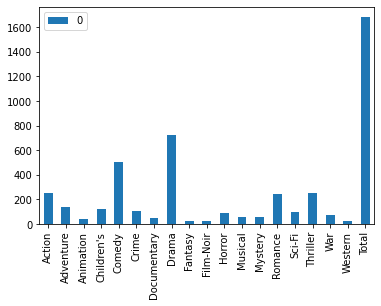

In [ ]:
#전체영화 장르분포+ 전체영화수
genrecnt.plot.bar()

<ipython-input-14-2daa2823545c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  movie_info_df.sum()[4:].plot.bar()


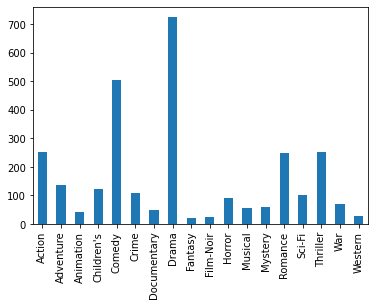

In [ ]:
#전체영화 장르분포
movie_info_df.sum()[4:].plot.bar()

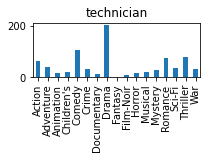

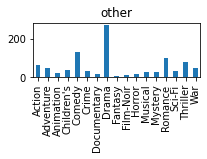

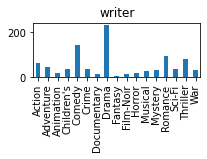

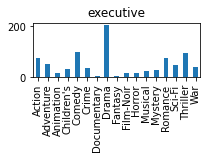

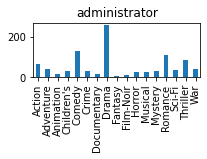

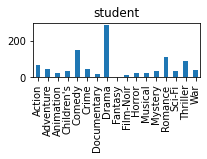

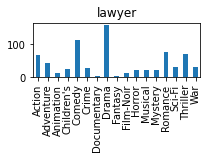

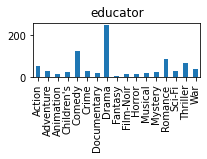

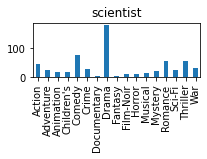

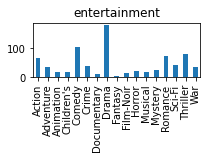

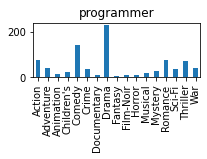

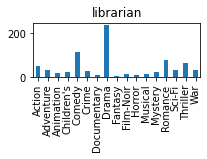

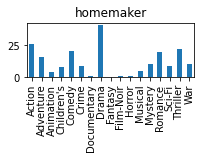

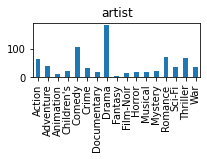

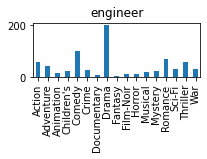

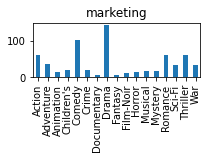

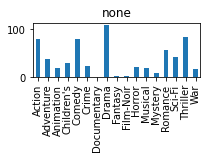

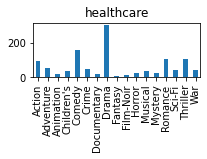

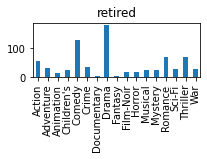

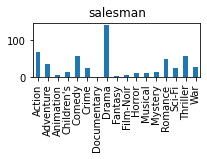

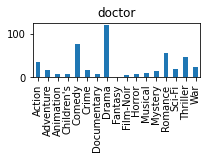

In [ ]:
##각직업별 평균점수보다 높게 평가한영화들 장르- 위전체영화장르 분포를 따름 -> 선호도 반영이 적음  
for oc in occ:
    user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:-1].plot.bar(title=f'{oc}', figsize=(3,1))

    plt.show()


In [ ]:
# normalisation
# 별점기준-분포

In [ ]:
#사용자 평가 경향 같다고 가정- 

In [ ]:
user_rating_movie_df.query(f'occupation=="{occ[0]}"').groupby('item_id').mean().query(f'rating > {meanscore[occ[0]]}')

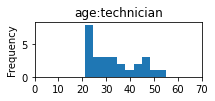

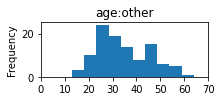

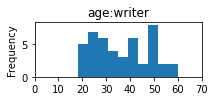

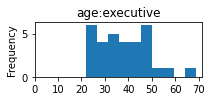

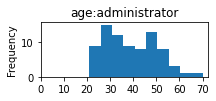

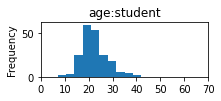

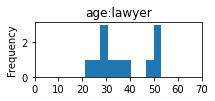

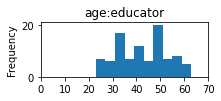

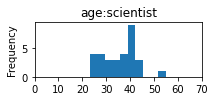

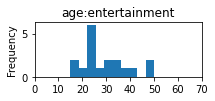

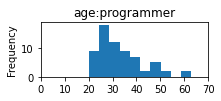

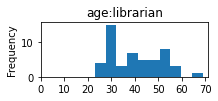

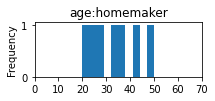

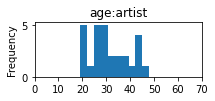

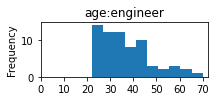

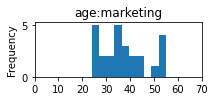

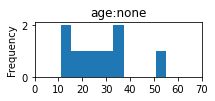

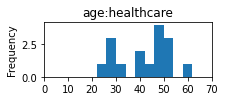

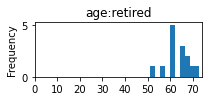

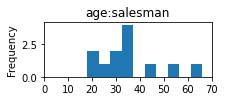

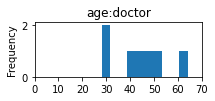

In [ ]:
#직업별 나이 분포
for oc in occ:
    user_info_df.query(f'occupation=="{oc}"').age.plot.hist(xticks=[0,10,20,30,40,50,60,70],title=f'age:{oc}',figsize=(3,1))
    plt.show()

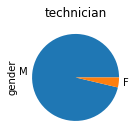

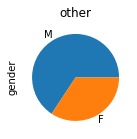

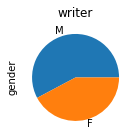

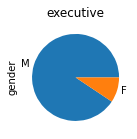

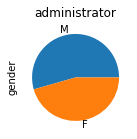

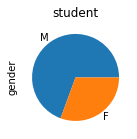

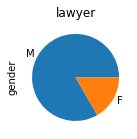

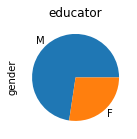

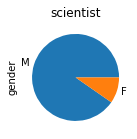

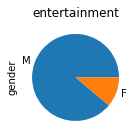

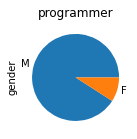

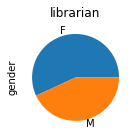

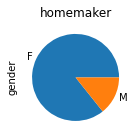

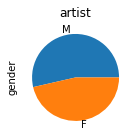

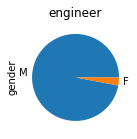

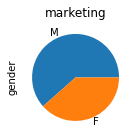

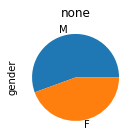

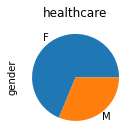

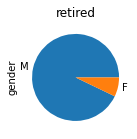

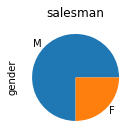

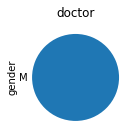

In [ ]:
#직업별 성별비율
for oc in occ:
    user_info_df.query(f'occupation=="{oc}"').gender.value_counts().plot.pie(title=f'{oc}',figsize=(2,2))
    plt.show()

<ipython-input-17-8d2658b26df6>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ((user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:])/(movie_info_df.sum()[4:])).plot.bar(title=f'{oc}', figsize=(3,1))


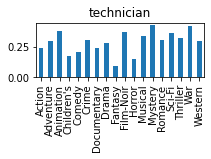

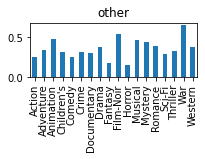

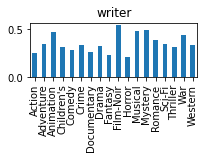

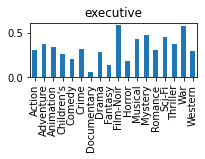

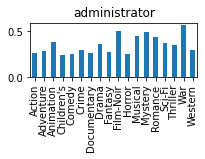

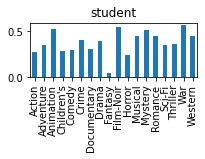

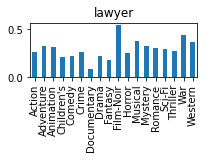

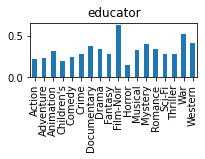

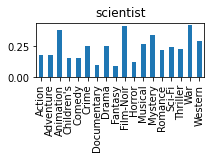

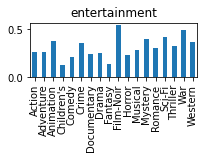

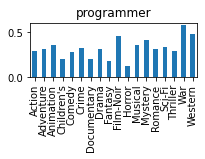

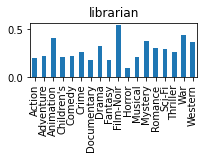

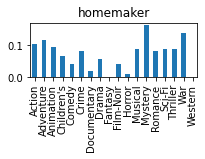

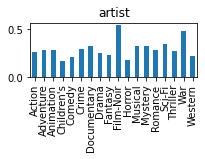

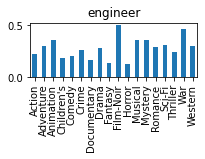

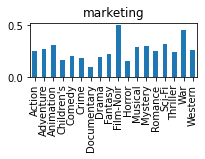

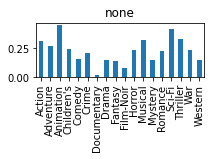

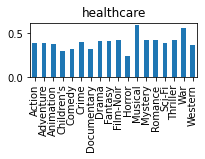

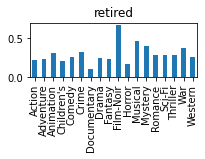

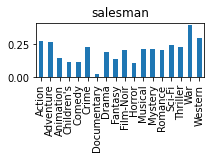

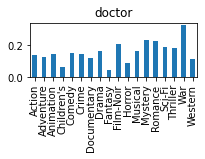

In [ ]:
#각 직업별 장르선호도를 알기위해 전체장르수로 나눔
for oc in occ:
    ((user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:])/(movie_info_df.sum()[4:])).plot.bar(title=f'{oc}', figsize=(3,1))
    plt.show()

In [ ]:
# user_rating_movie_df.occupation.value_counts()

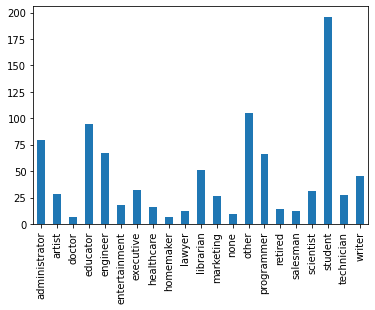

In [ ]:
# 직업당 유저수
user_info_df.occupation.value_counts().sort_index().plot.bar()

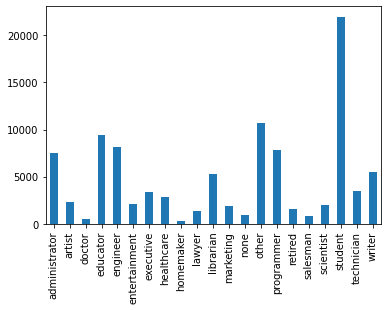

In [ ]:
# 직업별 별점남긴수 - scientist가 유저수에 비해 별점을 덜남김
user_rating_movie_df.occupation.value_counts().sort_index().plot.bar()

In [ ]:
occ

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
user_rating_movie_df.groupby(['occupation']).user_id.value_counts()['writer'][:3].index


Int64Index([293, 201, 896], dtype='int64', name='user_id')

In [ ]:
occ_review_n #직업별 유저당 리뷰개수 (높은순)

user_id
occupation    user_id         
administrator 7            403
              151          307
              194          305
              328          283
              95           278
...                        ...
writer        842           27
              801           26
              50            24
              736           24
              558           20

[943 rows x 1 columns]

In [ ]:
#각 직업당 별점이 높은영화 정렬
user_rating_df.groupby(['occupation','item_id']).mean().sort_values(['occupation','rating'],ascending=False)

user_id  rating     timestamp        age
occupation    item_id                                             
writer        18       385.000000     5.0  8.849150e+08  36.000000
              74       617.000000     5.0  8.837889e+08  27.000000
              130      503.000000     5.0  8.794388e+08  50.000000
              650      382.333333     5.0  8.837815e+08  46.666667
              652      441.500000     5.0  8.817460e+08  31.000000
...                           ...     ...           ...        ...
administrator 1408     194.000000     1.0  8.795553e+08  38.000000
              1411     194.000000     1.0  8.795543e+08  38.000000
              1469     500.000000     1.0  8.838762e+08  28.000000
              1534     452.000000     1.0  8.762982e+08  35.000000
              1662     762.000000     1.0  8.787193e+08  32.000000

[18552 rows x 4 columns]

In [ ]:
user_rating_df.groupby(['occupation']).mean()['rating']

occupation
administrator    3.635646
artist           3.653380
doctor           3.688889
educator         3.670621
engineer         3.541407
entertainment    3.441050
executive        3.349104
healthcare       2.896220
homemaker        3.301003
lawyer           3.735316
librarian        3.560781
marketing        3.485641
none             3.779134
other            3.552377
programmer       3.568260
retired          3.466750
salesman         3.582944
scientist        3.611273
student          3.515143
technician       3.532230
writer           3.375723
Name: rating, dtype: float64

In [ ]:
occ

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [ ]:
occ[-3]

'retired'

In [ ]:
totalmean= rating_df.mean().rating
totalmean

3.52986

In [ ]:
retiredlike= user_rating_movie_df.query(f'occupation=="{occ[-3]}"').groupby('item_id').mean().query(f'rating > {meanscore[occ[-3]]}')

In [ ]:
########대중적취향추천1-(리뷰수가많고-깜빡함)전체평균점수 높고 해당직업군에서도 평균점수가 높은영화 #movieid 169

retiredlike[retiredlike.movie_id.isin(user_rating_movie_df.groupby('item_id').mean().query(f'rating > {totalmean}+0.7').index)].sort_values('rating', ascending=False).head(10)

,user_id,rating,timestamp,age,movie_id,video_release_date,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,,,
169,394.000000,5.000000,8.894724e+08,58.500000,169.0,NaN,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,308.000000,5.000000,8.877383e+08,60.000000,408.0,NaN,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
134,358.250000,4.750000,8.876027e+08,63.250000,134.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,340.666667,4.666667,8.903414e+08,59.000000,511.0,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
285,403.714286,4.428571,8.845881e+08,64.142857,285.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,415.200000,4.400000,8.885907e+08,63.600000,479.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
603,340.666667,4.333333,8.904262e+08,59.000000,603.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
178,371.666667,4.333333,8.885537e+08,62.666667,178.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
657,358.250000,4.250000,8.875390e+08,63.250000,657.0,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
169 in unwatched_movie_ids

True

In [ ]:
#######특이취향추천-전체평균점수 낮은영화 지만 해당직업군에서는 평균점수가 높은영화 #movieid 158

retiredlike[retiredlike.movie_id.isin(user_rating_movie_df.groupby('item_id').mean().query(f'rating < {totalmean}').index)].sort_values('rating', ascending=False).head(10)

,user_id,rating,timestamp,age,movie_id,video_release_date,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,,,
158,318.0,5.0,884498709.0,65.0,158.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,752.0,5.0,891208452.0,60.0,271.0,NaN,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
697,318.0,5.0,884496008.0,65.0,697.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1065,308.0,5.0,887739382.0,60.0,1065.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
201,308.0,5.0,887737334.0,60.0,201.0,NaN,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
715,584.0,4.5,886865949.0,65.0,715.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,291.5,4.5,885346810.5,64.0,20.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1463,493.0,4.5,891770917.0,60.0,1463.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,313.0,4.0,886118928.5,62.5,708.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_movie_ids = movie_info_df.index
watched_movie_ids = rating_df[rating_df['user_id']==106].item_id
unwatched_movie_ids = set(all_movie_ids)- set(watched_movie_ids)


In [ ]:
158 in unwatched_movie_ids

True

In [ ]:
movie_info_df.query('movie_id==158')

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
157,158,Weekend at Bernie's (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Weekend%20at%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#선호 장르
occprefer= {}
for oc in occ:
    occprefer[f'{oc}'] = list(((user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:])/(movie_info_df.sum()[4:])).sort_values(ascending=False).index)[:3]

occprefer   

<ipython-input-31-fc8475947aaa>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  occprefer[f'{oc}'] = list(((user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:])/(movie_info_df.sum()[4:])).sort_values(ascending=False).index)[:3]


{'technician': ['Mystery', 'War', 'Animation'],
 'other': ['War', 'Film-Noir', 'Animation'],
 'writer': ['Film-Noir', 'Mystery', 'Musical'],
 'executive': ['Film-Noir', 'War', 'Mystery'],
 'administrator': ['War', 'Film-Noir', 'Mystery'],
 'student': ['War', 'Film-Noir', 'Animation'],
 'lawyer': ['Film-Noir', 'War', 'Musical'],
 'educator': ['Film-Noir', 'War', 'Western'],
 'scientist': ['War', 'Film-Noir', 'Animation'],
 'entertainment': ['Film-Noir', 'War', 'Sci-Fi'],
 'programmer': ['War', 'Western', 'Film-Noir'],
 'librarian': ['Film-Noir', 'War', 'Animation'],
 'homemaker': ['Mystery', 'War', 'Adventure'],
 'artist': ['Film-Noir', 'War', 'Sci-Fi'],
 'engineer': ['Film-Noir', 'War', 'Mystery'],
 'marketing': ['Film-Noir', 'War', 'Sci-Fi'],
 'none': ['Animation', 'Sci-Fi', 'Thriller'],
 'healthcare': ['Musical', 'War', 'Mystery'],
 'retired': ['Film-Noir', 'Musical', 'Mystery'],
 'salesman': ['War', 'Western', 'Action'],
 'doctor': ['War', 'Mystery', 'Romance']}

In [ ]:
# #비선호/자주보지않은
# occnotprefer= {}
# for oc in occ:
#     occnotprefer[f'{oc}'] = list(((user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:])/(movie_info_df.sum()[4:])).sort_values(ascending=False).index)[-3:]

# occnotprefer  

In [ ]:
#직업별 선호장르순으로 장르 리스트
occgenre= {}
for oc in occ:
    occgenre[f'{oc}'] = list(((user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:])/(movie_info_df.sum()[4:])).sort_values(ascending=False).index)
occgenre

<ipython-input-23-1fe7a58541bc>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  occgenre[f'{oc}'] = list(((user_rating_movie_df.query(f'occupation=="{oc}"').groupby('item_id').mean().query(f'rating > {meanscore[oc]}').sum().astype(int)[7:])/(movie_info_df.sum()[4:])).sort_values(ascending=False).index)


{'technician': ['Mystery',
  'War',
  'Animation',
  'Film-Noir',
  'Sci-Fi',
  'Musical',
  'Thriller',
  'Romance',
  'Crime',
  'Western',
  'Adventure',
  'Drama',
  'Action',
  'Documentary',
  'Comedy',
  "Children's",
  'Horror',
  'Fantasy'],
 'other': ['War',
  'Film-Noir',
  'Animation',
  'Musical',
  'Mystery',
  'Romance',
  'Drama',
  'Western',
  'Adventure',
  'Thriller',
  'Crime',
  "Children's",
  'Documentary',
  'Sci-Fi',
  'Comedy',
  'Action',
  'Fantasy',
  'Horror'],
 'writer': ['Film-Noir',
  'Mystery',
  'Musical',
  'Animation',
  'War',
  'Romance',
  'Sci-Fi',
  'Adventure',
  'Western',
  'Crime',
  'Drama',
  'Thriller',
  "Children's",
  'Comedy',
  'Documentary',
  'Action',
  'Fantasy',
  'Horror'],
 'executive': ['Film-Noir',
  'War',
  'Mystery',
  'Sci-Fi',
  'Musical',
  'Thriller',
  'Adventure',
  'Animation',
  'Crime',
  'Romance',
  'Action',
  'Western',
  'Drama',
  "Children's",
  'Comedy',
  'Horror',
  'Fantasy',
  'Documentary'],
 'admi

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366470 sha256=d5cca220fecdc1e80725749b7a930cbb735c62bd26d3f4714fe0281145a03fb8
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
import surprise


In [ ]:
#knnwithzscore 로 평점 정규화가능
#사용자 평가 경향 같다고 가정 했가에 스킵

In [ ]:


reader = Reader(line_format='user item rating', sep ='\t')
data = Dataset.load_from_df(rating_df[['user_id','item_id','rating']], reader = reader)


In [ ]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

In [ ]:
#similarity test 결과 비교- msd가 test 결과 더 좋음

simnames=['msd','pearson','cosine']
for sim in simnames:
    sim_options = {'name':f'{sim}'}
    recom_sys = surprise.KNNBasic(k = 40,min_k=1, sim_options=sim_options)
    recom_sys.fit(trainset)
    test_pred = recom_sys.test(testset)
    # test_pred[:2]
    print(f'{sim}:{surprise.accuracy.rmse(test_pred,verbose=False)}\n')

Computing the msd similarity matrix...
Done computing similarity matrix.
msd:0.9818937807443516

Computing the pearson similarity matrix...
Done computing similarity matrix.
pearson:1.0146945268623406

Computing the cosine similarity matrix...
Done computing similarity matrix.
cosine:1.0207001526441868



In [ ]:
#msd 로 씀
sim_options = {'name':'msd'}
recom_sys = surprise.KNNBasic(k = 40,min_k=1, sim_options=sim_options)
recom_sys.fit(trainset)
test_pred = recom_sys.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
#한명 지정- retired 중 가장높은비율- 남자,60대  #닉네임주기 - eg. mr.청바지
user_info_df.query('user_id == 106')

,user_id,age,gender,occupation,zip_code
105,106,61,M,retired,55125


In [ ]:
themean = rating_df.query('user_id == 106').mean().rating
themean #그분 평균점수

3.765625

In [ ]:
all_movie_ids = movie_info_df.index
watched_movie_ids = rating_df[rating_df['user_id']==106].item_id
unwatched_movie_ids = set(all_movie_ids)- set(watched_movie_ids)
len(watched_movie_ids)

64

In [ ]:
all_pred_scores = []

for mv_id in unwatched_movie_ids:
    pred = recom_sys.predict(106,mv_id)
    single_pred_result = {'movie_id':mv_id,'recom_score':pred.est}
    all_pred_scores.append(single_pred_result)
all_pred_scores[:10]

[{'movie_id': 0, 'recom_score': 3.534375},
 {'movie_id': 2, 'recom_score': 3.1938198096628163},
 {'movie_id': 3, 'recom_score': 3.0457046786982165},
 {'movie_id': 4, 'recom_score': 3.8404388604809223},
 {'movie_id': 5, 'recom_score': 3.356616360707892},
 {'movie_id': 6, 'recom_score': 3.4763639164440314},
 {'movie_id': 7, 'recom_score': 3.5344799958231157},
 {'movie_id': 10, 'recom_score': 3.858429010367137},
 {'movie_id': 11, 'recom_score': 3.8165557871602545},
 {'movie_id': 13, 'recom_score': 3.44719276026914}]

In [ ]:
#날자형식변환, 평균점수보다 높게 예측된 영화
recom_score_df = pd.DataFrame(all_pred_scores)
recom_score_df = recom_score_df.sort_values('recom_score',ascending=False)
recom_score_df = pd.merge(recom_score_df, movie_info_df)
recom_score_df['release_date_dt'] = pd.to_datetime(recom_score_df['release_date'])
recom_score_df.query(f'recom_score > {themean}')

,movie_id,recom_score,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_dt
0,1191,5.000000,"Letter From Death Row, A (1998)",01-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Letter+From+D...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998-02-01
1,1536,5.000000,Aiqing wansui (1994),22-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Aiqing%20Wans...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996-07-22
2,1201,5.000000,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Marlene%20Die...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996-04-02
3,1629,5.000000,Nico Icon (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Nico%20Icon%2...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995-01-01
4,1293,5.000000,Star Kid (1997),16-Jan-1998,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1998-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,392,3.771160,"Man Without a Face, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Man%20Without...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1993-01-01
336,1005,3.771108,"Double vie de Véronique, La (Double Life of Ve...",01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Podwojne%20zy...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1991-01-01
337,152,3.770861,Sleeper (1973),01-Jan-1973,NaN,http://us.imdb.com/M/title-exact?Sleeper%20(1973),0,0,0,0,...,0,0,0,0,0,1,0,0,0,1973-01-01
338,425,3.767612,Bob Roberts (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Bob%20Roberts...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1992-01-01


In [ ]:
retiredgenre= occgenre['retired']
retiredgenre

['Film-Noir',
 'Musical',
 'Mystery',
 'War',
 'Crime',
 'Animation',
 'Sci-Fi',
 'Romance',
 'Thriller',
 'Western',
 'Comedy',
 'Drama',
 'Adventure',
 'Fantasy',
 'Action',
 "Children's",
 'Horror',
 'Documentary']

In [ ]:
######추천- (비선호장르가 아닌) 선호장르 영화 중 높은 예상점수 -movieid 1064
recomtop = recom_score_df.query(f'recom_score > {themean}')
recomtop[(recomtop[retiredgenre[0]]==1)|(recomtop[retiredgenre[1]]==1)&(recomtop[retiredgenre[-1]]==0)&(recomtop[retiredgenre[-2]]==0)&(recomtop[retiredgenre[-3]]==0)]

,movie_id,recom_score,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_dt
20,1064,4.490566,Crossfire (1947),01-Jan-1947,NaN,http://us.imdb.com/M/title-exact?Crossfire%20(...,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1947-01-01
42,484,4.357152,"Maltese Falcon, The (1941)",01-Jan-1941,NaN,http://us.imdb.com/M/title-exact?Maltese%20Fal...,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1941-01-01
43,302,4.340697,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1997-01-01
50,657,4.291576,"Manchurian Candidate, The (1962)",01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Manchurian%20...,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1962-01-01
59,654,4.266086,Chinatown (1974),01-Jan-1974,NaN,http://us.imdb.com/M/title-exact?Chinatown%20(...,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1974-01-01
89,488,4.160908,Sunset Blvd. (1950),01-Jan-1950,NaN,http://us.imdb.com/M/title-exact?Sunset%20Boul...,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1950-01-01
108,611,4.108827,Laura (1944),01-Jan-1944,NaN,http://us.imdb.com/M/title-exact?Laura%20(1944),0,0,0,0,...,1,0,0,1,0,0,0,0,0,1944-01-01
111,525,4.106756,"Big Sleep, The (1946)",01-Jan-1946,NaN,"http://us.imdb.com/M/title-exact?Big%20Sleep,%...",0,0,0,0,...,1,0,0,1,0,0,0,0,0,1946-01-01
114,186,4.099973,"Blues Brothers, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Blues%20Broth...,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1980-01-01
118,705,4.088559,Singin' in the Rain (1952),01-Jan-1952,NaN,http://us.imdb.com/M/title-exact?Singin'%20in%...,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1952-01-01


In [ ]:
#######추천- 청춘나이때 계봉한 영화 #현년도 1998년도라 가정 #청춘18~30세사이라가정 #movieid 178
userage= int(user_info_df.query('user_id == 106').age)
userage
yearsagofrom= 1998-(userage-18)
yearsagoto= 1998-(userage-30)
yearsagofrom, yearsagoto

(1955, 1967)

In [ ]:
recomtop.query(f'{yearsagofrom}<release_date_dt.dt.year<{yearsagoto}')

,movie_id,recom_score,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_dt
26,178,4.449280,12 Angry Men (1957),01-Jan-1957,NaN,http://us.imdb.com/M/title-exact?12%20Angry%20...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1957-01-01
32,427,4.411420,To Kill a Mockingbird (1962),01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?To%20Kill%20a...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1962-01-01
37,479,4.377696,Vertigo (1958),01-Jan-1958,NaN,http://us.imdb.com/M/title-exact?Vertigo%20(1958),0,0,0,0,...,0,0,0,1,0,0,1,0,0,1958-01-01
47,199,4.314060,"Bridge on the River Kwai, The (1957)",01-Jan-1957,NaN,http://us.imdb.com/M/title-exact?Bridge%20on%2...,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1957-01-01
50,657,4.291576,"Manchurian Candidate, The (1962)",01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Manchurian%20...,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1962-01-01
55,641,4.277835,Paths of Glory (1957),01-Jan-1957,NaN,http://us.imdb.com/M/title-exact?Paths%20of%20...,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1957-01-01
65,520,4.251056,"Great Escape, The (1963)",01-Jan-1963,NaN,http://us.imdb.com/M/title-exact?Great%20Escap...,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1963-01-01
69,1125,4.236753,"Innocents, The (1961)",01-Jan-1961,NaN,"http://us.imdb.com/M/title-exact?Innocents,%20...",0,0,0,0,...,0,0,0,0,0,0,1,0,0,1961-01-01
70,474,4.235629,Dr. Strangelove or: How I Learned to Stop Worr...,01-Jan-1963,NaN,http://us.imdb.com/M/title-exact?Dr.%20Strange...,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1963-01-01
71,480,4.224108,North by Northwest (1959),01-Jan-1959,NaN,http://us.imdb.com/M/title-exact?North%20by%20...,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1959-01-01


In [ ]:
########추천-손자랑보기좋은영화 -movie_id 114
recomtop.query('Animation==1')

,movie_id,recom_score,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_dt
14,114,4.567157,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,NaN,http://us.imdb.com/Title?Wallace+%26+Gromit%3A...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1996-04-05
16,169,4.548859,"Wrong Trousers, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1993-01-01
30,408,4.413436,"Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1996-04-28
34,1367,4.390113,Faust (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Faust%20%2819...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1994-01-01
144,189,4.035662,"Grand Day Out, A (1992)",01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Grand%20Day%2...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1992-01-01
155,95,4.022656,Aladdin (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Aladdin%20(1992),0,0,0,1,...,0,0,1,0,0,0,0,0,0,1992-01-01
253,71,3.882646,"Lion King, The (1994)",01-Jan-1994,NaN,"http://us.imdb.com/M/title-exact?Lion%20King,%...",0,0,0,1,...,0,0,1,0,0,0,0,0,0,1994-01-01
310,969,3.809070,Winnie the Pooh and the Blustery Day (1968),01-Jan-1968,NaN,http://us.imdb.com/M/title-exact?Winnie%20the%...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1968-01-01
